# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import pandas as pd
import numpy as np

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:
sensor.head(10)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
5,1.476302,-0.700807,0.669443,0.760912,0.644835,-0.072116,0.187742,-0.763656,0.226057,0.168241,0.145906,0.012455
6,1.455153,-0.694408,0.662593,0.763300,0.639930,-0.088666,0.343096,-0.803820,0.278468,0.079382,-0.026344,-0.195590
7,1.441702,-0.690710,0.656459,0.764380,0.637084,-0.099229,0.176202,-0.172756,0.056415,0.069360,0.072678,-0.102920
8,1.443440,-0.691905,0.651196,0.763796,0.638005,-0.097803,0.274786,0.446585,-0.132766,0.072889,0.079921,-0.075323
9,1.443071,-0.693039,0.638198,0.763042,0.638878,-0.097993,0.633672,0.316372,-0.115137,0.098347,-0.017021,-0.197310


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [6]:
# Your code here:
sensor.shape
#1751 rows & 12 columns

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [30]:
# Your code here:
sensor['time'] = pd.date_range(start='1/1/2018 00:00:00', periods=1751, freq='S')
sensor


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRatex,rotationRate.y,rotationRate.z,userAccelerationx,userAcceleration.y,userAcceleration.z,time
time,,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 00:29:06,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874,2018-01-01 00:29:06
2018-01-01 00:29:07,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738,2018-01-01 00:29:07
2018-01-01 00:29:08,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740,2018-01-01 00:29:08


Assign the time series index to the dataframe's index.

In [31]:
# Your code here:
sensor.index = pd.DatetimeIndex(sensor.time, freq='infer')
sensor = sensor.rename(columns={'userAcceleration.x':'userAccelerationx','rotationRate.x':'rotationRatex'})
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRatex,rotationRate.y,rotationRate.z,userAccelerationx,userAcceleration.y,userAcceleration.z,time
time,,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

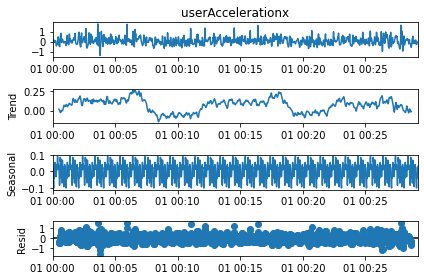

In [32]:
# Your code here:
import statsmodels.api as sm
%matplotlib inline

res = sm.tsa.seasonal_decompose(sensor.userAccelerationx, period=60)
resplot = res.plot()

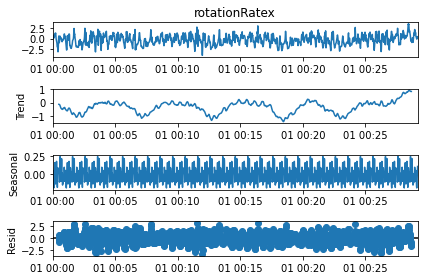

In [22]:
res2 = sm.tsa.seasonal_decompose(sensor.rotationRatex, period=60)
resplot2 = res2.plot()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

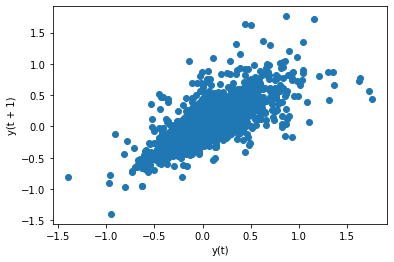

In [34]:
# Your code here:
from pandas.plotting import lag_plot

lag_plot(sensor.userAccelerationx)

Create a lag plot for `rotationRate.x`

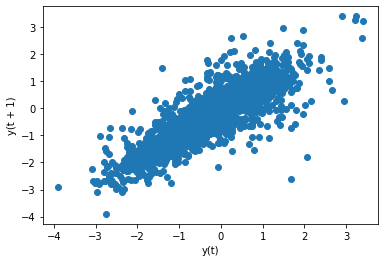

In [35]:
# Your code here:

lag_plot(sensor.rotationRatex)

What are your conclusions from both visualizations?

In [11]:
# Your conclusions here:

# Both have a positive relationship. RotationRateX seems to have the stronger relationship.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [38]:
# Your code here:
from statsmodels.tsa.stattools import adfuller
# H0: series is not stationary
# H1: series is stationary

print(adfuller(sensor.userAccelerationx)[1])
print(adfuller(sensor.rotationRatex)[1])

2.823439483037483e-30
6.320230335912605e-06


What are your conclusions from this test?

In [13]:
# Your conclusions here:
# We can reject the null hypothesis with a 95% confidence level which means we reject that the series is not stationary.


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [40]:
# Your code here:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(sensor.userAccelerationx, order=(2, 1)) # moving average model: n=2 periods, q=1 period
model_fit = model.fit(disp=False)
predictions = model_fit.predict(len(sensor.userAccelerationx)-10, len(sensor.userAccelerationx)-1)

In [42]:
df = pd.DataFrame({'observed':sensor.userAccelerationx[-10:], 'predicted':predictions})
df

,observed,predicted
time,,
2018-01-01 00:29:01,0.149749,0.172776
2018-01-01 00:29:02,0.038461,0.115159
2018-01-01 00:29:03,-0.169175,-0.008270
2018-01-01 00:29:04,-0.300361,-0.186762
2018-01-01 00:29:05,-0.270174,-0.229211
2018-01-01 00:29:06,-0.268367,-0.136440
2018-01-01 00:29:07,-0.102444,-0.162658
2018-01-01 00:29:08,-0.085590,0.035719
2018-01-01 00:29:09,-0.048105,-0.043530


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [48]:
# Your code here:

import statsmodels.tools.eval_measures as sm

rmse = sm.rmse(df['observed'],df['predicted'])
rmse

0.09383216762938856

In [49]:
print(np.min(sensor['userAccelerationx']))
print(np.max(sensor['userAccelerationx']))

mean = np.mean(sensor['userAccelerationx'])
per_error = ((rmse/sensor['userAccelerationx'])*mean*100)
per_error

-1.3988200000000002
1.760975


time
2018-01-01 00:00:00     1.988454
2018-01-01 00:00:01     2.672606
2018-01-01 00:00:02    54.730555
2018-01-01 00:00:03   -69.899054
2018-01-01 00:00:04     2.940134
                         ...    
2018-01-01 00:29:06    -2.185005
2018-01-01 00:29:07    -5.723939
2018-01-01 00:29:08    -6.851071
2018-01-01 00:29:09   -12.189651
2018-01-01 00:29:10    -9.019753
Freq: S, Name: userAccelerationx, Length: 1751, dtype: float64

In [ ]:
# Our dependent variable ranges from -1.38 til 1.76 